# How to use Control toolbox in Python

In [1]:
import requests as req
try:
    %run basic_material.py
    print('Basic file found')
except:    
    print('Basic not file found - downloading it')
    url = "https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py"
    res = req.get(url)
    file = open('basic_material.py', 'w')
    file.write(res.text)
    file.close()

try:
    from control.matlab import *
except:
    !python3 -m pip install control
    from control.matlab import *

Running Python: 3.8.17
Running Sympy: 1.12rc1
Basic file found


In [2]:
# define P as a transfer function
P = tf([0, 4],[1,2,3])
P

TransferFunction(array([4]), array([1, 2, 3]))

In [3]:
# Second approach
s = tf('s')
P = 4/(s**2 + 2*s + 3)
P

TransferFunction(array([4]), array([1, 2, 3]))

In [4]:
# third approach
A = [[0, 1],[-3, -2]]
B = [[0],[1]]
C = [[4, 0],[0, 1]]
D = [[0],[0]]
Pss = ss(A,B,C,D)
Pss

<LinearIOSystem:sys[13]:['u[0]']->['y[0]', 'y[1]']>

In [5]:
def near_zero(P):
    for ii in range(len(P.num[0][0][:])):
        if abs(P.num[0][0][ii]) < 1e-12:
            P.num[0][0][ii] = 0
        else:
            P.num[0][0][ii] = P.num[0][0][ii]
    return P

In [6]:
P = ss2tf(A,B,C[0][:],D[0][:]) # to be consistent with the above
# fix some poor scaling
P = near_zero(P)
P

TransferFunction(array([   0.000,    4.000]), array([   1.000,    2.000,    3.000]))

# Try some plotting

In [7]:
t = np.arange(0,10,0.01)
y,t = impulse(Pss,t)

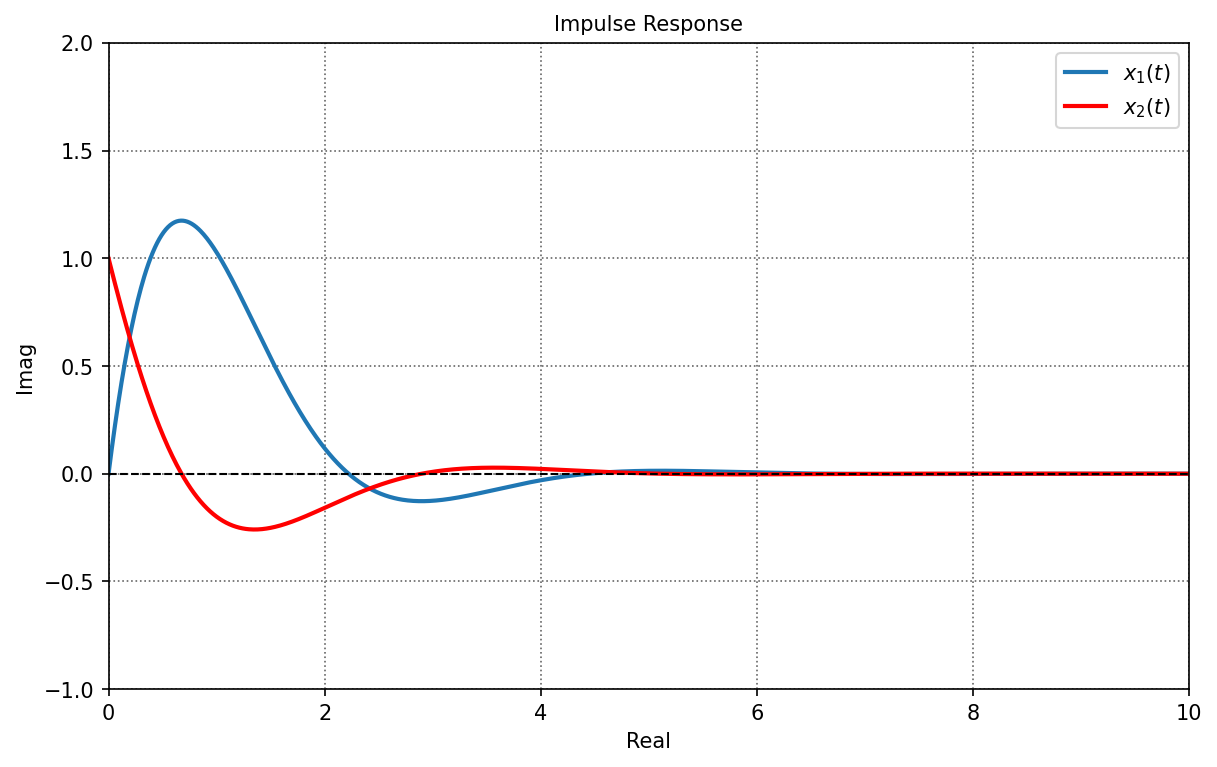

In [8]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t,y[:,0],label='$x_1(t)$')
plt.plot(t,y[:,1],'r',label='$x_2(t)$')

plt.legend()
plt.xlim(0,10)
plt.ylim(-1,2)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Impulse Response')
nicegrid()
plt.show()

In [9]:
t = np.arange(0,10,0.01)
y,t = step(Pss,t)

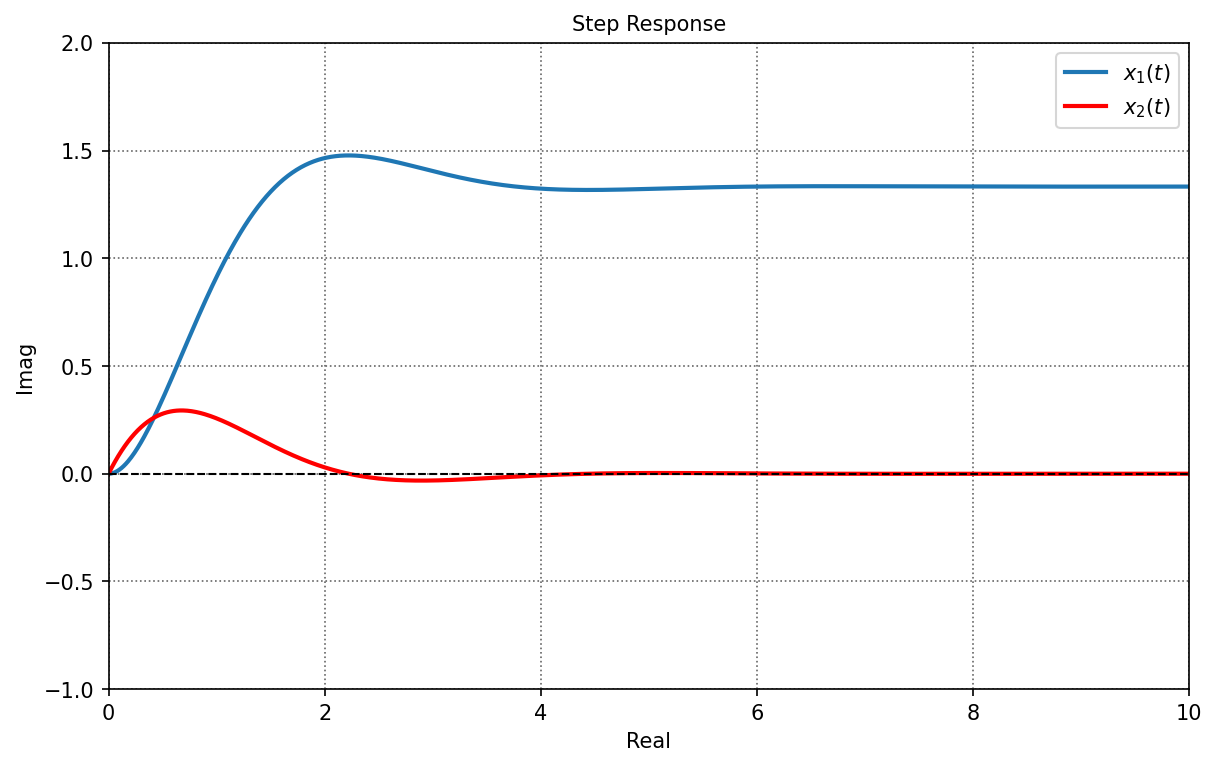

In [10]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t,y[:,0],label='$x_1(t)$')
plt.plot(t,y[:,1],'r',label='$x_2(t)$')

nicegrid()
plt.legend()
plt.xlim(0,10)
plt.ylim(-1,2)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Step Response')
plt.show()


In [11]:
X0 = [0, -1]
y,t = initial(Pss,t,X0)

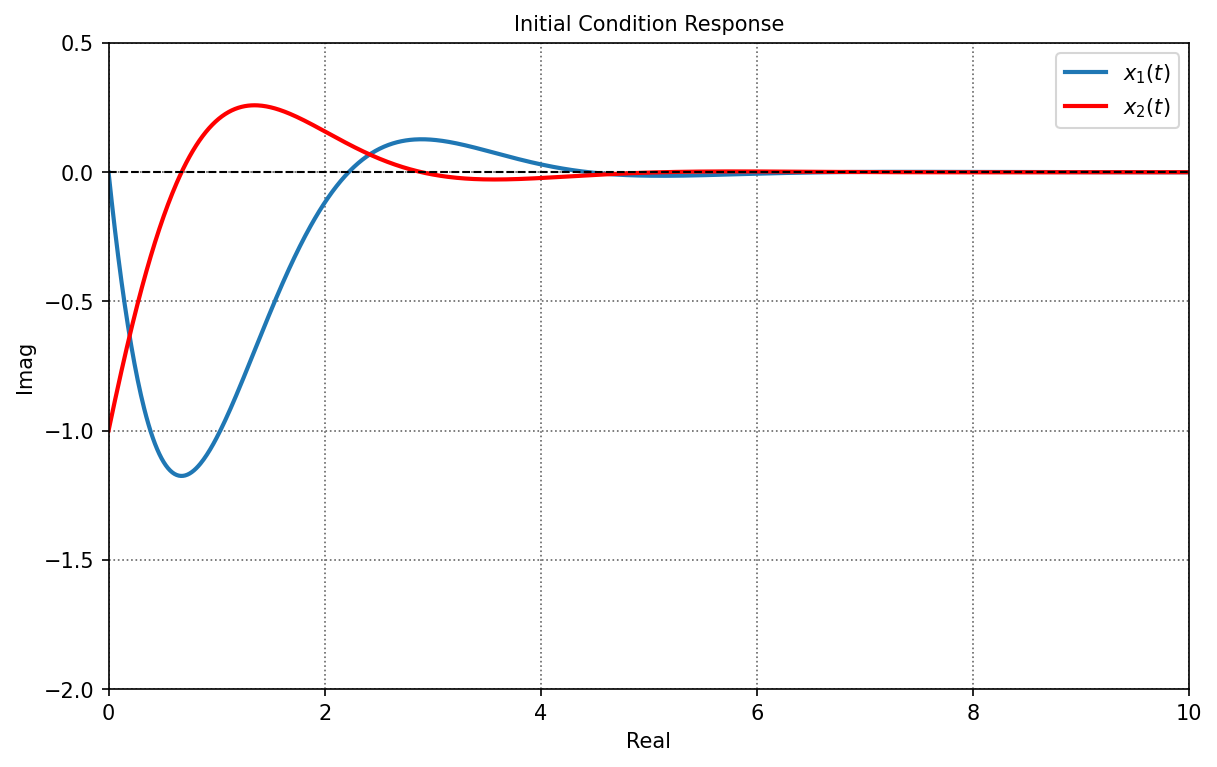

In [12]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t,y[:,0],label='$x_1(t)$')
plt.plot(t,y[:,1],'r',label='$x_2(t)$')

nicegrid()
plt.legend()
plt.xlim(0,10)
plt.ylim(-2,0.5)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Initial Condition Response')
plt.show()


In [13]:
U = np.sin(5*2*np.pi*t)
y,t,xout = lsim(Pss,U,t,X0)

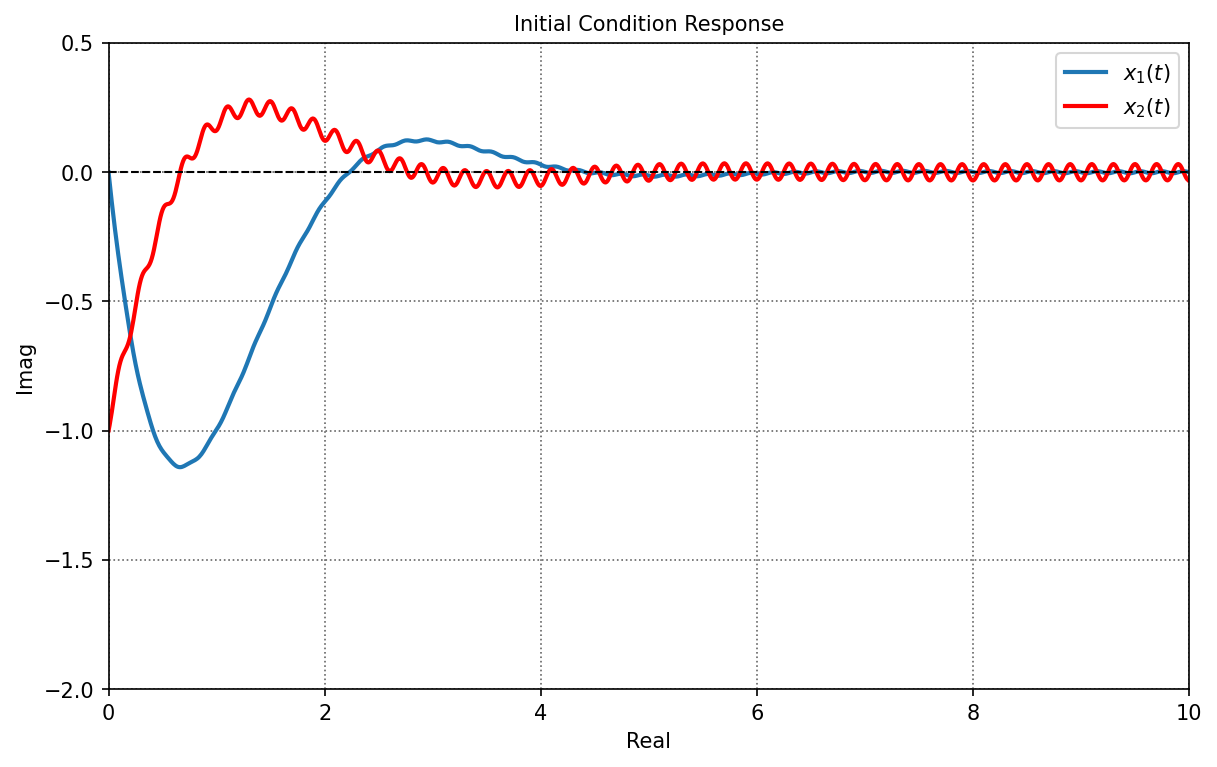

In [14]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t,y[:,0],label='$x_1(t)$')
plt.plot(t,y[:,1],'r',label='$x_2(t)$')

nicegrid()
plt.legend()
plt.xlim(0,10)
plt.ylim(-2,0.5)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Initial Condition Response')
plt.show()


(0.01, 100)

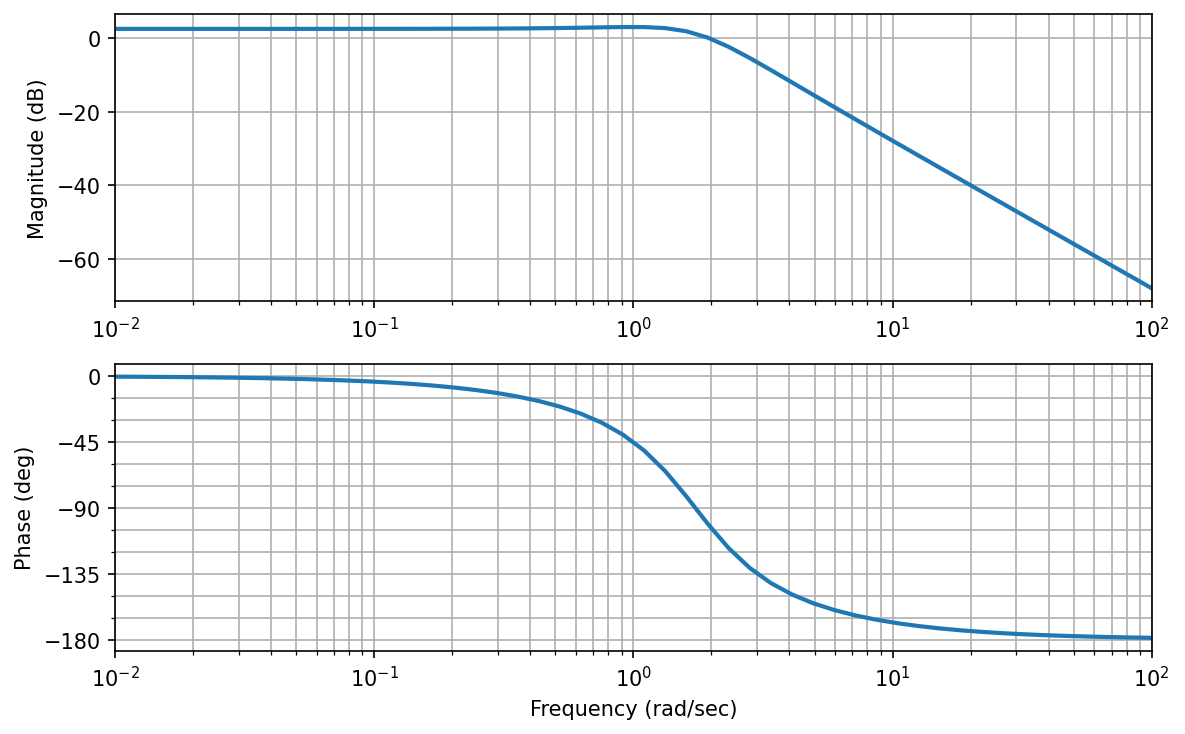

In [15]:
s = tf('s')
P = 4/(s**2 + 2*s + 3)
plt.figure(1,figsize=(8,5))
gain, phase, w = bode(P, logspace(-2,2))
plt.xlim(.01,100)

In [16]:
GM, PM, wpc, wgc = margin(P)
print(f'GM = {20*np.log10(GM):2f}')
print(f'PM = {PM:2f}')
print(f'wpc = {wpc:2f}')
print(f'wgc = {wgc:2f}')


GM = inf
PM = 78.047144
wpc = nan
wgc = 1.956637
